# Análisis Exploratorio de Datos | Lluvias en Australia

El dataset elegido contiene datos de aproximadamente 10 años de observaciones meteorológicas diarias de muchos lugares de Australia.

### Listado de variables y selección

#### VARIABLES DE ENTRADA

#### Utilizadas

* Date: fecha de observación.
* Location: nombre común de la ubicación de la estación meteorológica.
* MinTemp: temperatura mínima en grados centígrados.
* MaxTemp: temperatura máxima en grados centígrados.
* Rainfall: la cantidad de lluvia registrada para el día en mm.
* Evaporation: la llamada evaporación de la bandeja de clase A (mm) en las 24 horas anteriores a las 9 am.
* Sunshine: número de horas de sol brillante en el día.
* Humidity9am: humedad (porcentaje) a las 9 am.
* Humidity3pm: humedad (porcentaje) a las 3 pm.
* Pressure9am: presión atmosférica (hpa) reducida al nivel medio del mar a las 9 am.
* Pressure3pm: presión atmosférica (hpa) reducida al nivel medio del mar a las 3 pm.
* Cloud9am: fracción del cielo oscurecida por las nubes a las 9 am. Esto se mide en “octas”, que son una unidad de octavos. Registra cuántos octavos del cielo están oscurecidos por las nubes. Una medida 0 indica cielo completamente despejado, mientras que un 8 indica que está completamente nublado.
* Cloud3pm: fracción de cielo oscurecida por nubes (en “octas”: octavos) a las 3 pm.
* RainToday: booleano. 1 si la precipitación (mm) en las 24 horas anteriores a las 9 am excede 1 mm, de lo contrario 0.

#### No utilizadas

Descartamos las siguientes variables porque no consideramos que sean determinantes para que llueva:
* WindGustDir: dirección de la ráfaga de viento más fuerte en las 24 horas anteriores a la medianoche.
* WindGustSpeed: velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas anteriores a la medianoche.
* WindDir9am: dirección del viento a las 9 am.
* WindDir3pm: dirección del viento a las 3 pm.
* WindSpeed9am: velocidad del viento (km/h) promediada durante 10 minutos antes de las 9 am.
* WindSpeed3pm: velocidad del viento (km/h) promediada durante 10 minutos antes de las 3 pm.

Decidimos no tenerlas en cuenta porque ya consideramos la temperatura máxima y mínima:
* Temp9am: temperatura (grados centígrados) a las 9 am.
* Temp3pm: temperatura (grados centígrados) a las 3 pm.

#### VARIABLE DE SALIDA

* RainTomorrow: si, dados los datos de un día, lloverá o no al día siguiente. Se considera que sí llovió, a partir de 1mm. Valores posibles: Yes, No.

### Descripción general

In [2]:
# importamos herramientas necesarias
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# importamos el dataset y eliminamos columnas que no utilizaremos
dataset = pd.read_csv('weatherAUS.csv')
dataset_completo = pd.read_csv('weatherAUS.csv') # lo utilizaremos para analizar variables no elegidas, más adelante
del dataset['WindGustDir']
del dataset['WindGustSpeed']
del dataset['WindDir9am']
del dataset['WindDir3pm']
del dataset['WindSpeed9am']
del dataset['WindSpeed3pm']
del dataset['Temp9am']
del dataset['Temp3pm']
dataset.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
141698,2015-10-29,Darwin,24.8,34.6,0.0,7.6,10.9,60.0,41.0,1014.5,1010.2,1.0,1.0,No,No
13560,2013-05-02,Moree,11.1,24.6,0.0,4.8,NaN,49.0,34.0,1020.0,1018.4,7.0,7.0,No,No
14726,2016-07-11,Moree,8.8,21.1,0.0,NaN,NaN,74.0,56.0,1020.2,1015.7,7.0,2.0,No,No
131385,2012-10-25,Hobart,8.5,11.2,4.6,1.4,0.0,93.0,91.0,1010.1,1006.0,NaN,NaN,Yes,Yes
113045,2013-03-04,Witchcliffe,14.7,24.8,3.0,NaN,NaN,61.0,49.0,1005.0,1005.6,NaN,NaN,Yes,No


In [5]:
dataset.isnull().sum()

Date                0
Location            0
MinTemp          1485
MaxTemp          1261
Rainfall         3261
Evaporation     62790
Sunshine        69835
Humidity9am      2654
Humidity3pm      4507
Pressure9am     15065
Pressure3pm     15028
Cloud9am        55888
Cloud3pm        59358
RainToday        3261
RainTomorrow     3267
dtype: int64

No detectamos diferencias en las unidades de medida de los datos de entrada, por lo que no consideramos que sea necesario realizar transformaciones. Decidimos eliminar las filas que tienen valores en nulo.

In [18]:
dataset = dataset.dropna(how='any',axis=0)

In [19]:
dataset.shape

(61918, 15)

### Análisis detallado de un conjunto de variables

#### 1) Para la variable de salida, explicar y graficar su balanceo y qué consecuencias va a tener eso a la hora de entrenar modelos.

<AxesSubplot:ylabel='RainTomorrow'>

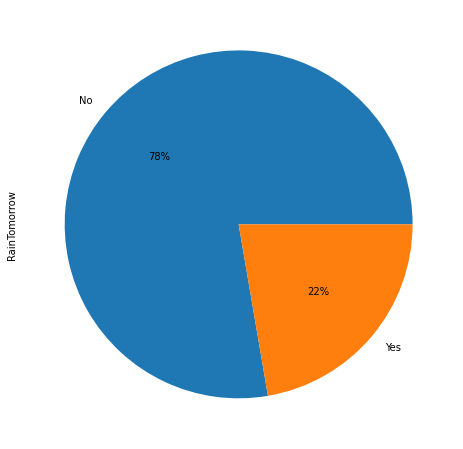

In [20]:
dataset.RainTomorrow.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

#### 2) Para 5 variables de entrada (elegidas o no, pero incluyendo al menos 3 elegidas) graficar y explicar cómo se comportan y cómo afectan a la variable de salida.

In [24]:
# Utilizadas: presión 9am, temperatura máxima, humedad 9am
# No utilizadas: WindGustSpeed, Temp9am 

#### 3) Verificar si existen variables altamente correlacionadas con la variable "target". En dicho caso, explicar por qué considera que esto pasa.

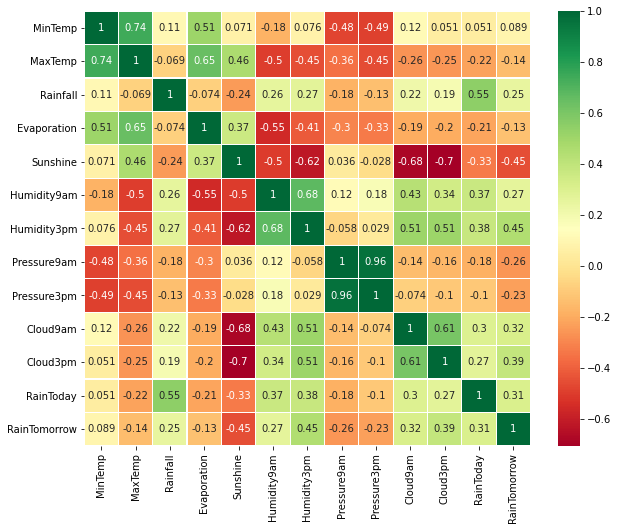

In [21]:
dataset["RainToday"] = dataset.RainToday.replace(['No', 'Yes'], [0, 1])
dataset["RainTomorrow"] = dataset.RainTomorrow.replace(['No', 'Yes'], [0, 1])
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()